#  Programming and Visualisation
This exercise is to familiarize yourself with one of the programming environments and introduce standard ways of visualisation. Possible options are Python, R, Julia or MATLAB. For more details, see the programming resources on ISIS.

Please note that the data files for the following exercises are available on ISIS.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas, sys, os, math
from PIL import Image
from random import randint

%matplotlib inline

## Scatter and Line Plots
1. Read the data in the file _expDat.txt_. Each row contains the number of events (of 20 observed processes) counted in one of 100 subsequent time intervals. The first column contains the respective time index. Each other column corresponds to one of 20 different observed processes.
2. Create a line plot – one line for each column where the X-axis refers to time index.
3. Create a scatter plot matrix for the first 5 columns (i.e., 25 pairwise scatter plots).
4. Compute the covariance matrix by centering & matrix multiplication. Plot this matrix with a heatplot and compare it to the result when using inbuilt functions such as _cov_ or _cor_.

(20, 20)


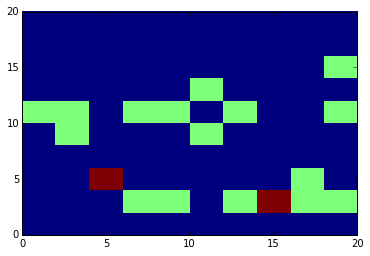

In [3]:
#1.1a
data = np.loadtxt(open("expDat.txt","r"),delimiter=",",skiprows=1,usecols=range(1,21))

#1.1b
plt.plot(data)
plt.savefig("1.1b line plot.png")
plt.close()

#1.1c
pandas.tools.plotting.scatter_matrix(pandas.DataFrame(data.T[0:5].T, columns=range(0,5)), alpha=0.2)
plt.savefig("1.1c scatter plot.png")
plt.close()

#1.1d
def ComputeCenteredMatrix( matrix ):
    #column_means = 1/len(data) * numpy.dot( numpy.full((1, len(data)), 1) , matrix )
    scale = 1.0/len(matrix)
    column_sums = np.dot( np.full((1, len(matrix)), 1) , matrix )
    column_means = scale * column_sums
    expanded_column_means = np.dot( np.full((len(matrix), 1), 1), column_means )
    centered_matrix = matrix - expanded_column_means
    return centered_matrix

def ComputeCovarianceMatrix( matrix ):
    centered_matrix = ComputeCenteredMatrix( matrix )
    scale = 1.0/len(matrix)

    return scale * np.dot( np.transpose(centered_matrix), centered_matrix )

our_covariance_matrix = ComputeCovarianceMatrix( data )
their_covariance_matrix = np.cov( data.T )
print( their_covariance_matrix.shape)

for i in range(0,len(our_covariance_matrix.T)):
    #print len(covariance_matrix[i])
    plt.hist2d(range(1,21), our_covariance_matrix.T[i], range=[[0, 20], [0, 20]])
plt.show()

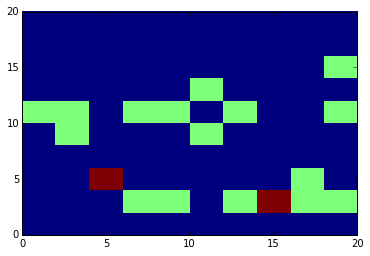

In [4]:
for i in range(0,len(their_covariance_matrix.T)):
    #print len(covariance_matrix[i])
    plt.hist2d(range(1,21), their_covariance_matrix.T[i], range=[[0, 20], [0, 20]])
plt.show()

## Plotting 3d 
1. Read the data contained in the file _pca-data-3d.txt_.
2. Make a scatter plot matrix for all the columns.
3. Visualize the data in 3d. How do you interpret your results?
4. Pick the first two dimensions and plot the data in a scatter plot. Project the 2d data onto the unit vectors with angles 0, 15, ..., 180 degrees from the x-axis and compute the variance along these directions. Plot variance against angle.


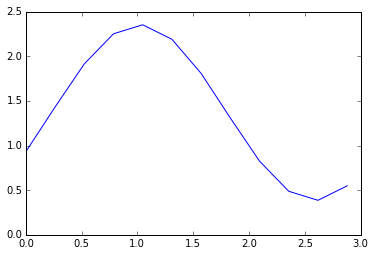

In [5]:
#1.2a
data = np.loadtxt(open("pca-data-3d.txt","rb"),delimiter=",",skiprows=1)

#1.2b
pandas.tools.plotting.scatter_matrix(pandas.DataFrame(data, columns=['x', 'y', 'z']), alpha=0.2)
plt.savefig("1.2a scatter matrces.png")
plt.close()

#1.2c
'''
dataframe = pandas.DataFrame(data, columns=['x', 'y', 'z'])
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.T[0], data.T[1], data.T[2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
'''

#1.2d
variances = []
for i in range(0, 12, 1):
    angle = i*np.pi/12
    unitvector = np.array([np.cos(angle), np.sin(angle)])
    projectionscalars = unitvector.dot( data.T[0:2] )
    projectionx = projectionscalars * unitvector[0]
    projectiony = projectionscalars * unitvector[1]
    variances.append(np.var(projectionscalars))

plt.plot(np.array(range(0,12))*np.pi/12, variances)
plt.show()

## Data Processing: Image data 
1. Read in the data from the file _natIMG.jpg_.
2. Plot the data using a heatmap with a ’color’ scale ranging from black to white.
3. Sample 100 image patches of size 10x10=100 pixels.
4. Plot these patches using the same color scheme as above.

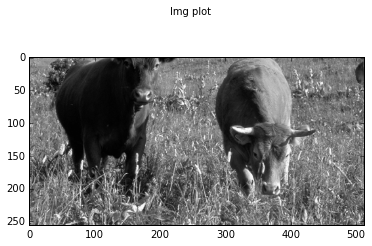

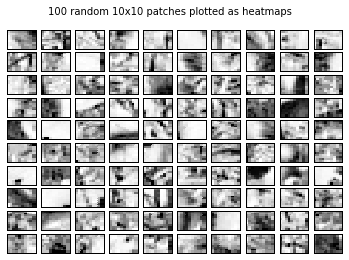

In [6]:
#1.3
# a,b)
img = Image.open("natIMG.jpg")
imgAry = np.array(img)
h,w = imgAry.shape

fig = plt.figure()
fig.suptitle('Img plot')

imgplot = plt.imshow(img)
imgplot.set_cmap('gray')

# c,d)
numPatches   = 100
img_height, img_width = imgAry.shape
patch_height = 10
patch_width  = 10

p_per_row = int(math.sqrt(numPatches))

fig = plt.figure()
fig.suptitle('100 random 10x10 patches plotted as heatmaps')

for i in range(1, numPatches+1):
    ax = fig.add_subplot(p_per_row, p_per_row, i)

    y = randint(0, img_height - patch_height - 1)
    x = randint(0, img_width - patch_width - 1)

    roi = imgAry[y:y+patch_height, x:x+patch_width]

    ax.pcolormesh(roi, cmap=plt.cm.Greys)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

plt.show()